In [1]:
import numpy as np
import pandas as pd

In [2]:
path = "state-farm-distracted-driver-detection"
dataset = pd.read_csv(path+"/driver_imgs_list.csv")

In [3]:
dataset.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [4]:
labels = {'c0': 'Safe driving', 
          'c1': 'Texting - right', 
          'c2': 'Talking on the phone - right', 
          'c3': 'Texting - left', 
          'c4': 'Talking on the phone - left', 
          'c5': 'Operating the radio', 
          'c6': 'Drinking', 
          'c7': 'Reaching behind', 
          'c8': 'Hair and makeup', 
          'c9': 'Talking to passenger'}

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

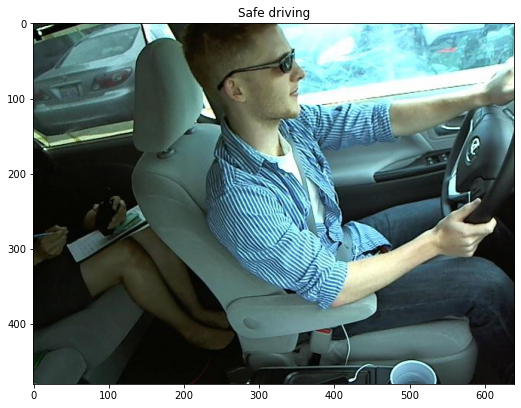

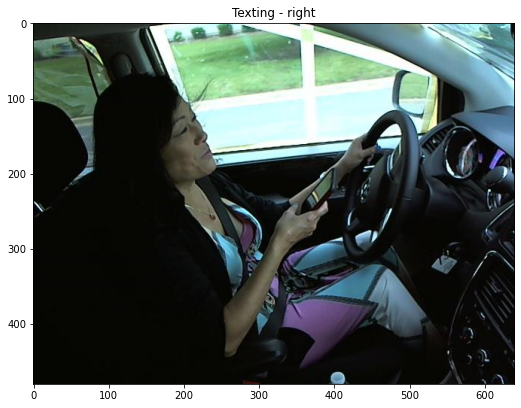

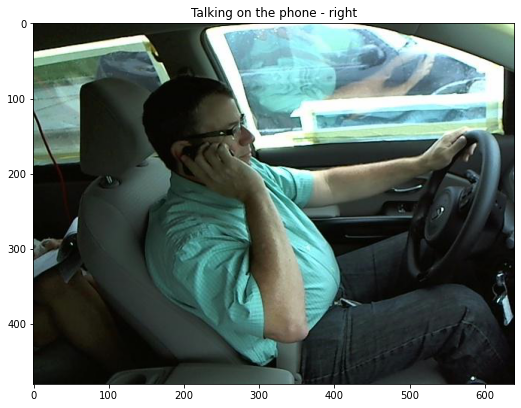

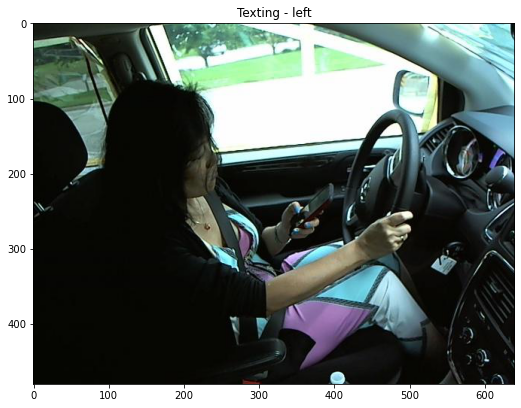

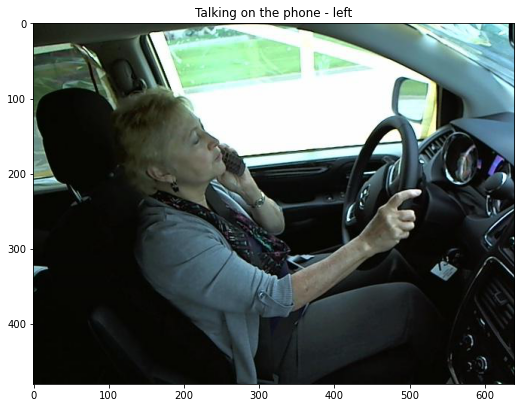

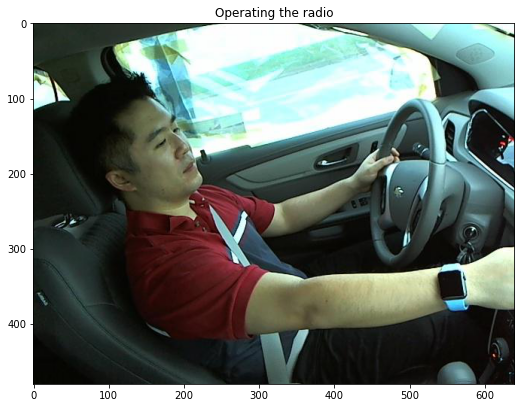

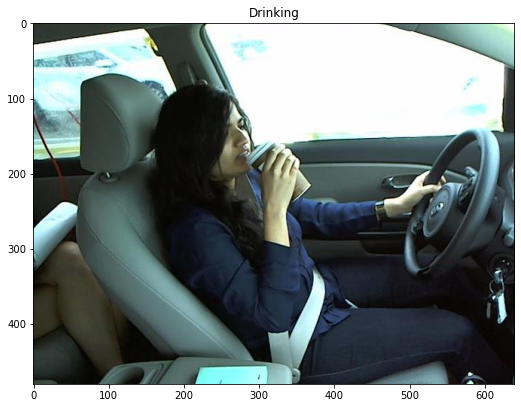

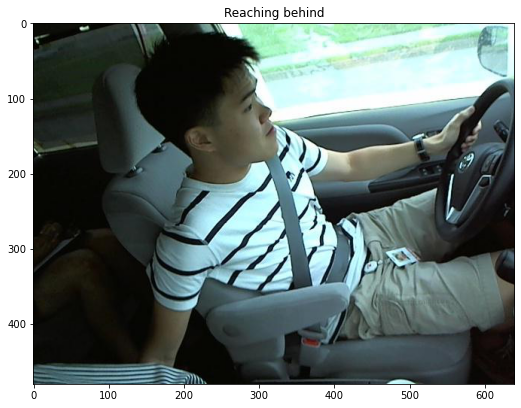

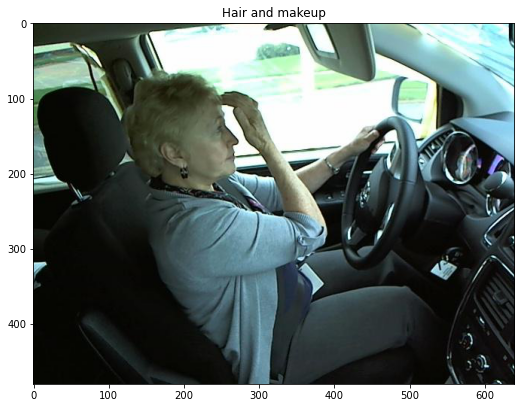

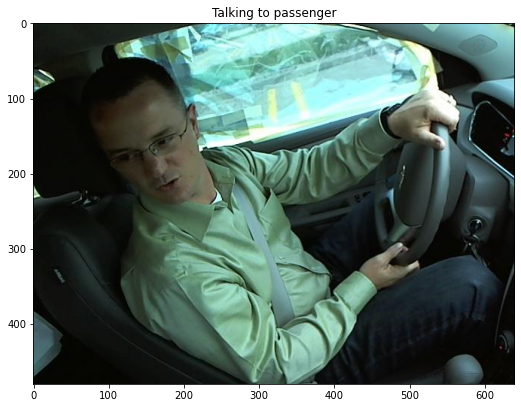

In [6]:
train_dir = path+"/train"
test_dir = path+"/test"
for i in os.listdir(train_dir):
    plt.figure(figsize=(50,50))
    for num in range(1,11):
            for images, image_name in enumerate(os.listdir(train_dir+"/"+i)[0:1]):
                filepath = train_dir + "/" + i + "/" + image_name
                img = mpimg.imread(filepath)
                plt.subplot(1,5,num)
                plt.title(labels[i])
                plt.imshow(img)
            break

In [15]:
import logging
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
logging.getLogger('tensorflow').setLevel(logging.FATAL)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augment_train_data = ImageDataGenerator(rescale = 1.0/255, 
                                        validation_split = 0.1)

augment_val_data = ImageDataGenerator(rescale = 1.0/255, 
                                      shear_range = 0.15, 
                                      zoom_range = 0.15, 
                                      horizontal_flip = True, 
                                      validation_split = 0.1)

train_set = augment_train_data.flow_from_directory(train_dir, 
                                                   target_size = (100, 100), 
                                                   batch_size = 32,
                                                   subset = 'training')

val_set = augment_val_data.flow_from_directory(train_dir, 
                                                 target_size = (100, 100), 
                                                 batch_size = 32,
                                                 subset = 'training')

Found 20187 images belonging to 10 classes.
Found 20187 images belonging to 10 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [10]:
model = Sequential()
model.add(Conv2D(128,(3, 3), activation='relu',input_shape = (100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(32,(3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024, activation ='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        1

In [16]:
history = model.fit(train_set,
          epochs = 10,
          validation_data = val_set,
          shuffle=True)

Epoch 1/10
631/631 [==============================] - 1526s 2s/step - loss: 0.6557 - accuracy: 0.7751 - val_loss: 3.1904 - val_accuracy: 0.5031
Epoch 2/10
631/631 [==============================] - 1344s 2s/step - loss: 0.0825 - accuracy: 0.9757 - val_loss: 4.1502 - val_accuracy: 0.4976
Epoch 3/10
631/631 [==============================] - 1390s 2s/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 4.2142 - val_accuracy: 0.5030
Epoch 4/10
631/631 [==============================] - 1415s 2s/step - loss: 0.0337 - accuracy: 0.9903 - val_loss: 4.6857 - val_accuracy: 0.5109
Epoch 5/10
631/631 [==============================] - 1219s 2s/step - loss: 0.0323 - accuracy: 0.9906 - val_loss: 7.3309 - val_accuracy: 0.5050
Epoch 6/10
631/631 [==============================] - 1210s 2s/step - loss: 0.0264 - accuracy: 0.9933 - val_loss: 5.9997 - val_accuracy: 0.5130
Epoch 7/10
631/631 [==============================] - 1049s 2s/step - loss: 0.0213 - accuracy: 0.9947 - val_loss: 5.6187 - val_accuracy:

In [36]:
from datetime import datetime
from pytz import timezone

est = datetime.now(timezone('EST'))
time = est.strftime("%y-%m-%d %H:%M")

model.save("C:\\Users\\User\\Documents\\The Knowledge Society\\Innovate\\ai hackathon\\Using Artifical Intelligence to Detect Distracted Driving\\models\\model.h5")

print(model_name)

models\20-10-15 20:07-loss-0.019-accuracy-0.994-val_loss-4.731-val_accuracy-0.509


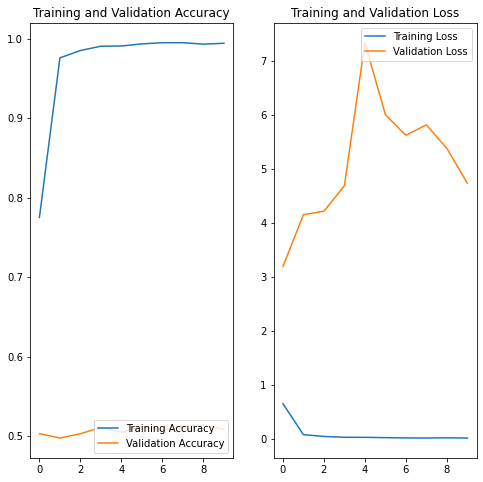

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

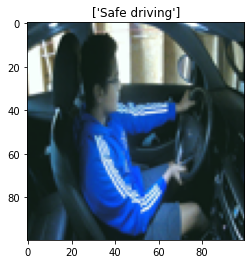

In [22]:
from PIL import Image

prediction = []
def predict_image(img_path):
    
    labels = {0: 'Safe driving', 1: 'Texting - right', 2: 'Talking on the phone - right', 3: 'Texting - left', 4: 'Talking on the phone - left', 
              5: 'Operating the radio', 6: 'Drinking', 7: 'Reaching behind', 8: 'Hair and makeup', 9: 'Talking to passenger'}

    loaded_model = tf.keras.models.load_model("C:\\Users\\User\\Documents\\The Knowledge Society\\Innovate\\ai hackathon\\Using Artifical Intelligence to Detect Distracted Driving\\models\\model.h5")
    open_img = Image.open(img_path).convert("RGB").resize((100,100)) #reaching back
    pred_img = np.array(open_img, dtype="float32")
    pred_img = np.expand_dims(pred_img, axis=0)
    pred_img /= 255.0
    pred_img = tf.convert_to_tensor(pred_img)

    prediction.append(labels[np.argmax(loaded_model.predict(pred_img))])
    
    plt.imshow(open_img)
    plt.title(prediction)

predict_image("C:\\Users\\User\\Documents\\The Knowledge Society\\Innovate\\ai hackathon\\Using Artifical Intelligence to Detect Distracted Driving\\god.jpg")